


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/kasparvonbeelen/ghi_python/4-tables?labpath=9_-_Data_Exploration_with_Pandas_Part_II.ipynb)


# Lecture 9: Data Exploration with Pandas Part II
## Part of: Data Science for Historians (with Python)
## A Gentle Introduction to Working with Data in Python


### For the German Historical Institute, London
Kaspar Beelen and Luke Blaxill

<img align="left" src="https://www.ghil.ac.uk/typo3conf/ext/wacon_ghil/Resources/Public/Images/institute_icon_small.png">

In this lecture, we continue to explore data frames but slowly dive into more analytical topics. The focus of this notebook is on summarizing numerical and categorical data with descriptive statistics.

This course doesn't provide a formal or rigorous introduction to data science. However, similarly to the Python part, we hope that through experimentation and tinkering with code and data, you will intuitively grasp how data science and text mining may be of relevance to a historians.

## Age and Gender in late-Victorian London

In our first statistical explorations, we use a small sample of synthetic census data from London. Because of rights issues and yadayadayada, we can not work with the original data. We, therefore, created a set that looks similar and (actually yields similar results) but is essentially a fake dataset artificially generated. You can read more on the topic of synthetic data [here](https://en.wikipedia.org/wiki/Synthetic_data). 

However, our dataset will have a similar structure to the historical census data, it records, in theory for each person in England, place of residency, age, sex and disability. The original census is richer, and also has information on the place of birth and occupations. However, we will work with a very simplified version of these data.

# Opening and manipulating dataframes with Pandas

As in the previous notebooks, we start with loading all the tools and packages that our analysis will require. The first line instructs the environment to show all plots in this notebook. Lines two till four import different libraries. In both cases, we use abbreviations to refer to these libraries later on (you'll notice 'pd' returning everywhere). This is just to save you time typing. In the last line we instruct Python to use `seaborn` for plotting (set it as default) this is just to make things look prettier! 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Then we can import the data into our notebook. The syntax should be familiar from the previous notebook: we use the function `read_csv` from the Pandas `pd` library to load a file stored in `'data/icem/EW01_london_sample.csv'`. The last argument `index_col` indicates we want the first column (index 0) to serve as the row index.

In [9]:
df = pd.read_csv('data/icem/EW01_london_subsample.csv',index_col=0)

In [10]:
df.head()

,RegDist,Sex,Age,Disability
0,Kensington,M,18,0
1,Greenwich,U,14,0
2,St George Hanover Square,M,38,0
3,St Olave Southwark,F,42,0
4,St George Hanover Square,M,19,0


RegDist (registration district), Sex, Age and Disability are called variables, i.e. the attributes that change for each observation (i.e. person). We first study these variables individually and later, in the following notebook, we analyse and interpret their relationship using correlation and linear regression.

The previous notebook introduced various methods and attributes that allow us to understand the structure of our data. Firstly we can print the `.shape` attribute (not a function, remember?), which expresses the dimensionality of the data frame (the number of rows and columns).

In [13]:
df.shape

(1105237, 4)

Rows are usually observations, in this case, individuals recorded in the 1901 census and living in London. The columns are attributes or features of these records: they capture the attributes of persons recorded in the census (the registration district, sex, age and disability).

Pandas DataFrames are the most common object we will encounter when working with structured data in Python. It provides many tools to describe, analyse and generally make sense of tabular information. A useful methods that gives a general description of the content is `.info()`. Applying this method to `df` we get:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105237 entries, 0 to 1105236
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   RegDist     1105237 non-null  object
 1   Sex         1105237 non-null  object
 2   Age         1105237 non-null  int64 
 3   Disability  1105237 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 42.2+ MB


Let's have a closer look at the summary.

- `Column`: the column name
- `Non-Null Count`: often data frames will contain missing data as we have encountered when wrangling the British Library catalogue metadata. Luckily, the data look complete (the non-null count is equal to the number of rows). Handling missing data is an important topic in data, but unfortunately outside the scope of this tutorial.
- `Dtype`: the data type of each column. This will play an important role later in this course, as the data type often determines the design of our analysis and experiments. This data frame contains two data types 'int64' and 'object'. `int64` are integers or counts. `Age` records the years since birth as a number i.e. `34` etc. `object` is a vaguer category and often indicates textual or mixed content. For example, `Sex` contains different codes or labels, 'F', 'M' and 'U'. We'll have a closer look at these variables later on in this course.


## Variable types

In general, we distinguish between the following variable types
- numerical: 
    - continuous: probabilities or ratios (e.g. np.float64
    - discrete: counts, number of words, years since birth (np.int64)
- categorical:
    - binary: sex np.object or np.int8 
    - ordinal: values that can be ordered but the step size is not fixed or easy to interpret. Applies to working with [Likert scales](https://en.wikipedia.org/wiki/Likert_scale), ratings. (np.object or np.int16)
    - nominal: distinct categories that can not be sorted in ascending or descending order (for example place of birth or registration district).

## Inspecting variables: plotting distributions.

To better understand the data, plotting and inspecting the distribution of the variables of interest is always a good starting point. A distribution conveys how often each value occurs in a variable.
For categorical data, we can apply the `value_counts()` method. This method ranks the unique values by their frequency of occurrence (in descending order). For example, we can easily pull up the distribution of men and women in our data and plot the results.

In [26]:
df['Sex'].value_counts()

F    576299
M    488456
U     40482
Name: Sex, dtype: int64

We observe that the `Sex` variable contains three categories `F`, `M` and `U`, the latter meaning `Unknown`.

We can obtain the same result using a slightly different syntax. In this case. we use the "dot" notation instead of square brackets: the column name follows as an attribute of the dataframe. This won't work if the column name contains a space, a special character or a protected name (such as `len`). Using the notation with square brackets is a safer option and will always work, but you may encounter examples that use the dot notation.

In [18]:
df.Sex.value_counts()

F    576299
M    488456
U     40482
Name: Sex, dtype: int64

By applying `.plot()`, we can visualize the distribution of these categories. We plot the occurrence of each label in the `Sex` column. The argument `kind` specifies the type of plot. Because we are visualizing categorical information a bar plot is more appropriate (each unique value is `Sex` is represented by one bar).

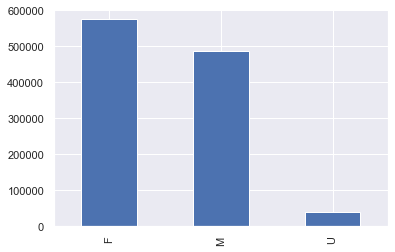

In [27]:
df['Sex'].value_counts().plot(kind='bar')

For sure, we could also make a line plot (changing `'bar'` to `'line'`). However, here we observe how the data type of a variable influences our analysis. A line plot is obviously not the most appropriate way for visualizing the distribution of categorical data. Not only is the figure less readable, it also suggests a continuity between values that isn't there.

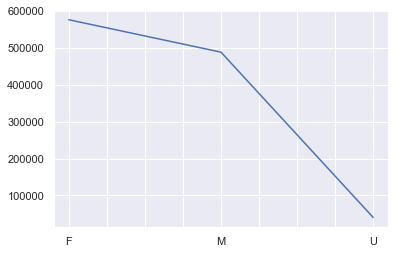

In [28]:
df['Sex'].value_counts().plot(kind='line')

To plot the distribution of a numerical variable, we need to follow a slightly different strategy. A common approach is to create a histogram, which tells us how often each element in a numeric variable occurs (there is more to it, but we come to that in a second).

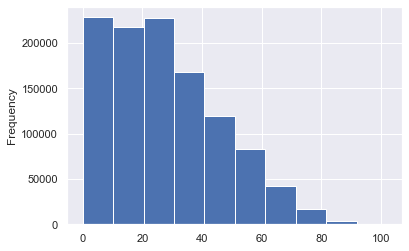

In [29]:
df['Age'].plot(kind='hist')

This figure shows the distribution of age of Londoners in 1900. Notice that age values appear grouped in separate 'bins', i.e. each bar covers approximately ten years in age difference (the first bar represent the number of people between 0 and 10). The largest group are between ca. 20 and 30 years old.

Depending on your research interest, you can make the plot more or less granular. 

We can, for example, show the same distribution dividing `Age` into 100 bins.

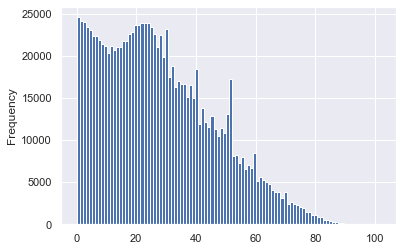

In [30]:
df['Age'].plot(kind='hist',bins=100)

Often it is more helpful to determine the bin size ourselves. We can do this by passing a list that determines the limits (start and end) of each bin. Here we try to plot the distribution of age with year as the basic unit.

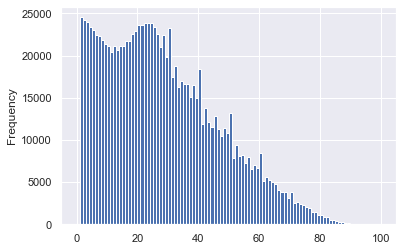

In [34]:
df['Age'].plot(kind='hist',bins=range(0,101,1))

Of course, looking at a distribution only gets you so far. We need more accurate methods to describe and summarize the data. This is where measures of location and spread can help us.

# Location and Dispersion

Plotting distributions enables us to grasp what the data "looks like", but it remains a superficial approach that doesn't give us much of a numerical grip. To describe and summarize the information with numbers, we have to rely on different strategies. 

In this context, to summarize a variable in one number, we'd often like to know what age was "typical"? Where are most of our data located? Looking at the distribution, you notice some values for "Age" are more common than others. Londoners were likely to be 20 to 30 years old than 90 to 100. 

In the next section, we will discuss different measures of location and spread, numbers that can help us better summarizing (and later comparing) data.

### range

Determining the range of values is often a good start. We first extract the most extreme values to know where all other values in a variable are located. In Pandas, we can apply the `.min()` and `.max()` methods to a column (with numerical values), and subtract them to obtain the range of values, in these the ages of people living in London.

In [35]:
max_age = df.Age.max()

In [36]:
min_age = df.Age.min()

In [37]:
range_age = max_age - min_age

In [38]:
print('Age maximum', max_age)
print('Age minimum', min_age)
print("Age range", range_age )

Age maximum 102
Age minimum 0
Age range 102


The oldest person in the London of 1901 (in our sample at least) was 102 years, the youngest was just born. In total, the range for "Age" is therefore 102 years.

## mean

The most common statistic to summarize a numeric variable is the "mean". In the example below, I record the number of cats I observed each day of the week. I collected these counts and saved them in the variable called 'cats_observed`.

In [39]:
cats_observed = [1,4,5,4,6,4,2]

The mean then could be interpreted as the number cats of I expect to observe in a day. This statistic is obtained by summing up all the cats I observed divided by the number of days.

In [40]:
sum_obs = np.sum(cats_observed)
len_obs = len(cats_observed)
print('total cats observed',sum_obs)
print('number of days ',len_obs)
print('mean',round(sum_obs /len_obs,2))

total cats observed 26
number of days  7
mean 3.71


In pandas we can compute the mean for a variable by applying the `.mean()` method.

In [41]:
df.Age.mean()

27.786728095422067

The question remains: is the mean a meaningful estimate of location? Are most of the values close to the mean? Imagine that I (by accident) enter an incorrect number of cats because the `2` on my keyboard doesn't function. As a result, I claim to have seen 222 cats on a Sunday (wow!).

In [43]:
obs =[1,4,5,4,6,4,222]
sum_obs = np.sum(obs)
len_obs = len(obs)
round(sum_obs /len_obs,2)

35.14

The mean changed substantially: I expect to see close to ten times as many cats! Because the mean is based on all the numbers in a variable, it is sensitive to extreme values. These extreme values can result from incorrect measurements or erroneous data entry. In such cases, it would be safe to remove them. However, often these values give us important information and we should retain them in our analysis or, at least, handle them carefully. In the next notebook, we have a more detailed discussion about outliers.

A more robust version of the mean is the trimmed mean, which first ranks all the values, and discards the values at both ends of the sorted list. `trim_mean` mean takes a list of numbers and has `proportiontocut` parameter. If we enter 0.1, we discard the first and last 10% of the values. 

In [47]:
from scipy.stats import trim_mean
help(trim_mean)

Help on function trim_mean in module scipy.stats.stats:

trim_mean(a, proportiontocut, axis=0)
    Return mean of array after trimming distribution from both tails.
    
    If `proportiontocut` = 0.1, slices off 'leftmost' and 'rightmost' 10% of
    scores. The input is sorted before slicing. Slices off less if proportion
    results in a non-integer slice index (i.e., conservatively slices off
    `proportiontocut` ).
    
    Parameters
    ----------
    a : array_like
        Input array.
    proportiontocut : float
        Fraction to cut off of both tails of the distribution.
    axis : int or None, optional
        Axis along which the trimmed means are computed. Default is 0.
        If None, compute over the whole array `a`.
    
    Returns
    -------
    trim_mean : ndarray
        Mean of trimmed array.
    
    See Also
    --------
    trimboth
    tmean : Compute the trimmed mean ignoring values outside given `limits`.
    
    Examples
    --------
    >>> from scipy 

In [48]:
trim_mean(df.Age,0.1)

26.32115459216391

The trimmed mean is slightly lower but does not suggest a substantial distortion by extreme values.

Statistics of location are often divided into robust and non-robust measures. The mean falls in the latter category because of its sensitivity to outliers. 

A common example of robust measures is the median, which is the middle of a sorted list of values. In the example below you'll notice that the median remains unchanged after including my erroneous observation 222 Sunday cats.


In [51]:
obs = [1,4,5,4,6,4,2]
obs.sort()
print(obs)
obs[3]

[1, 2, 4, 4, 4, 5, 6]


4

In [52]:
obs = [1,4,5,4,6,4,222]
obs.sort()
obs[3]

4

Pandas provides you with `.median()` method.

In [54]:
df.Age.median()

25.0

The median age of Londoners is 25 years.

The median is often called a robust measure of location because it ignores extreme values. But the median also has a weak spot: it attempts to measure location with just one number, i.e. the middle of a sorted variable. The mean, on the other hand, is based on all values in a variable. In this context, the trimmed mean appears as a good compromise: it ignores extremes but still includes most of the information we have.

If you stick with the median, a good option is to also look at quantiles.

In [55]:
df.Age.quantile([.25,.5,.75])

0.25    13.0
0.50    25.0
0.75    40.0
Name: Age, dtype: float64

The `.quantile()`method in the above example returns the  median—the middle value at 50%—and other relevant values at 25% and 75%. Together, they give you a good impression of where your data is located.

## Estimating Dispersion

The most 'typical' value in a series can only tell us so much. Taken by themselves, they tend to serve as unreliable as summaries. Measures of location are usually complemented by estimates of the spread around the expected values.

For example: if we compute the mean, we also want to know the extent to which values deviate from the mean: can we expect other values to appear close to the mean or not? 

The measures of spread calculate the deviation between our estimate of location (mean or median) and all other observed values. 

One of the most common measures of spread is the standard deviation.

Let's calculate the standard deviation manually to understand its meaning. We return to our example—cats observed by day—and start with computing the mean again.

In [57]:
cats_observed = [1,4,5,4,6,4,2]
mean = np.mean(cats_observed)
mean

3.7142857142857144

Then we calculate the distance of each value to the mean and take the power of two, which ensures that all values are positive. We are interested here in distance, not direction.

In [58]:
np.power(2,2) # 2 by the power 2

4

In [60]:
np.power(4,2) # 4 by the power 2

16

In [62]:
distances = [] # create an empty list
for v in cats_observed: # iterate over cats
    distances.append(np.power(v - mean,2)) # get distance between the number of cats observed and the mean
print(distances)

[7.367346938775511, 0.08163265306122441, 1.6530612244897955, 0.08163265306122441, 5.224489795918367, 0.08163265306122441, 2.9387755102040822]


Then we sum all the distance and divide by the number of observations minus one. The reason for  the 'minus one' isn't important here (it refers to the degrees of freedom. However, explaining this would amount to a diversion that probably obscures more than it explains. Anyway, we work with many observations, so it doesn't matter if you divide by `n` of `n - 1` because `n` will be large. 

In [67]:
sum_of_distances = np.sum(distances)

In [68]:
variance = sum_of_distances / (len(distances) -1)
variance

2.9047619047619047

Then the standard deviation is the square root of this value.

In [69]:
np.sqrt(variance)

1.7043362064926932

Luckily, there exists, of course, and method in Pandas for compute the standard deviation (or variance if you like). We first convert the list to instance of type `pd.Series` and then apply the `.std()` method.

In [70]:
co = pd.Series(cats_observed)
print('variance',co.var())
print('standard deviation',co.std())

variance 2.9047619047619047
standard deviation 1.7043362064926932


Of course we can now also compute the standard deviation of age in London population.

In [71]:
df.Age.std()

18.533045906567533

The value of computing these statistics becomes apparent when we start comparing groups and periods with each other. For example, if we compare two means, the standard deviation helps us to assess whether the difference between means points to substantial divergence. We will come back to this later. 

Another common metric is the median absolute deviation from the median or simply MAD. This is similar to the standard deviation replaces the mean with the median.

In [78]:
cats_observed.sort()
print(cats_observed)
median = cats_observed[int(len(cats_observed)/2)]
print(median)

[1, 2, 4, 4, 4, 5, 6]
4


In [79]:
distances = []
for v in cats_observed:
    distances.append(np.abs(v - median))
distances

[3, 2, 0, 0, 0, 1, 2]

In [80]:
distances.sort()
distances

[0, 0, 0, 1, 2, 2, 3]

In [81]:
distances[3]

1

In [82]:
from scipy.stats import median_abs_deviation
median_abs_deviation(cats_observed)

1.0

In [83]:
median_abs_deviation(df.Age)

13.0

# Grouping and Comparing Data

The measures we discussed in the preceding section are useful for comparing subgroups in our data. As Luke Blaxill explained in the first series of lectures, digital history often involves making meaningful and intelligent comparisons for understanding historical patterns. 

This means that we need to be question-driven. Of course, often the data will point in the opposite directions of our expectations, but that's OK. It is through conversation with empirical materials—asking questions, analysing the answers—that we gradually build new insights. 

Below, we will scrutinize the distribution of age in late Victorian London. We start with describing the data with summary statistics and later (the next notebook) proceed with other techniques that attempt to explain the variability in our data. 

## Sex and Age Differences in Late-Victorian London
### Studying the relation between categorical and numerical variables

Let's address a very specific question as our leading example in the following paragraphs: are women, on average, older than men? 

If we plot the distribution of age  (for all Londoners in our sample) with a histogram, you observe a slight camel-like shape: it exhibits two bumps, one in the category of very young, between 0 and 10, and another one for those in their twenties. Which is a kind of a strange pattern, no?


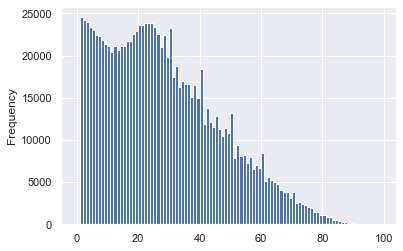

In [84]:
df.Age.plot(kind='hist',bins=range(100))


Does this distribution apply both to men and women? What happens if we split up the histogram by `Sex`?

Pandas, fortunately, provides useful methods to compare subgroups in a dataframe: `.groupby()`. Below we use `.groupby()` to compare the average `Age` by `Sex`.

In [85]:
df.groupby('Sex')['Age'].mean()

Sex
F    28.364215
M    27.380358
U    24.468924
Name: Age, dtype: float64

This syntax may come across as confusing at first sight. Let's have a closer look at what's happening here: `.groupby()` returns the mean age for each category in `Sex`. 


We will do the operations performed by `.groupby()` manually first, so you understand what is actually happening here. 

First, we split the dataframe by label or key. These are the unique values in the `Sex` variable.

In [86]:
df.Sex.unique()

array(['M', 'U', 'F'], dtype=object)

In [87]:
df_f = df[df.Sex=='F']
df_m = df[df.Sex=='M']
df_u = df[df.Sex=='U']

This creates three seperate dataframes one for each label 'F','M' and 'U'.

In [88]:
df_f.shape,df_m.shape

((576299, 4), (488456, 4))

We compute the mean "Age" for each dataframe separately.

In [89]:
mean_f = df_f['Age'].mean()
mean_m = df_m['Age'].mean()
mean_u = df_u['Age'].mean()

print('mean age "F"',mean_f)
print('mean age "M"',mean_m)
print('mean age "U"',mean_u)


mean age "F" 28.36421545066016
mean age "M" 27.380357698543982
mean age "U" 24.46892446025394


Lastly, we combine these values.

In [90]:
mean_age_by_gender = pd.Series([mean_f,mean_m,mean_u],index=['F','M','U'],name='Age')
mean_age_by_gender

F    28.364215
M    27.380358
U    24.468924
Name: Age, dtype: float64

The output of these steps is the same as applying `groupby()`, it only required more lines of code. 

In [91]:
df.groupby('Sex')['Age'].mean()

Sex
F    28.364215
M    27.380358
U    24.468924
Name: Age, dtype: float64

![groubpy](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Jake VanderPlas make a very apt visualisation of the process. Please consult his excellent book [here](https://jakevdp.github.io/PythonDataScienceHandbook/)

Of course, with `.groupby()` we can easily apply other measures, for example, compute the median instead of the mean.

In [92]:
df.groupby('Sex')['Age'].median()

Sex
F    26.0
M    25.0
U    20.5
Name: Age, dtype: float64

While the median is generally lower, the differences we observe remain rather stable: women in London seem generally one year older than men.

We can even compute multiple measures at once: the mean **and** the standard deviation. Below we apply `.agg()` to the `Age` column. `.agg()` here takes a list of functions (`np.mean`, `np.std`] which are in turn applied to each subsection of the dataframe. The results in a 3x2 table, with the rows corresponding to the labels in `Sex` and the columns to the different measures we selected (`np.mean` and `np.std`)

In [94]:
df.groupby('Sex')['Age'].agg([np.mean, np.std])

,mean,std
Sex,,
F,28.364215,18.726280
M,27.380358,18.288415
U,24.468924,18.219042


`.groupby()` can also be used for plotting! Instead of returning a number it will create a subplot (in this case histogram for each sex) and combine these into one figure. 

To make the figure more readable we added a few arguments
- `legend=True`: instructs Pandas to plot the label corresponding with each colour 
- `alpha=.5`: regulates transparency of the bars, which is always a good idea when combining histograms

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

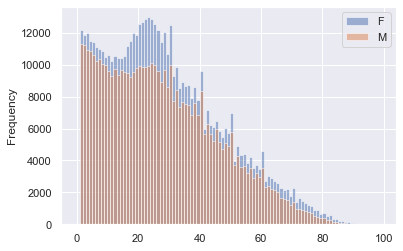

In [95]:
df[df.Sex.isin(['F','M'])].groupby('Sex')['Age'].plot(kind='hist',
                                                      legend=True,
                                                      bins=range(100),
                                                     alpha=.5)

Plotting the age distribution by gender helps us to understand the general camel-like pattern a bit better. In both categories, the histograms shows a concentration in the age category 20-30, but the trend is more pronounced among women than men.

But why at the orange bars systemically lower than the blue ones? Remember that the histogram plots the frequency of each bin. Because there are fewer men, these bars tend to be lower.

To avoid this, you can also make a density plot.

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

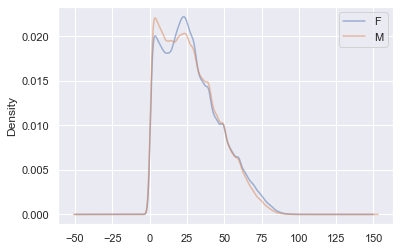

In [97]:
df[df.Sex.isin(['F','M'])].groupby('Sex')['Age'].plot(kind='density',
                                                      legend=True,
                                                      alpha=.5)

Violin plots provide another option for visualizing numerical and categorical data.

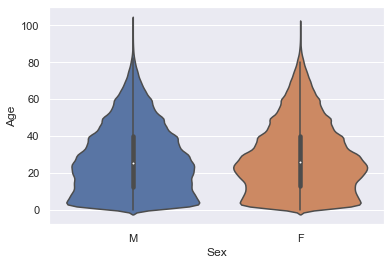

In [108]:
sns.violinplot(x='Sex',y='Age',data= df[df.Sex.isin(['M','F'])])

... or boxplot.

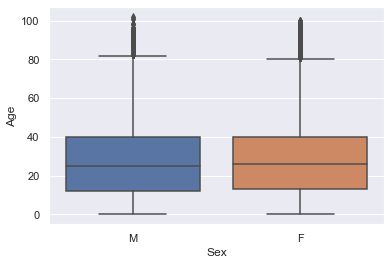

In [109]:
sns.boxplot(x='Sex',y='Age', data = df[df.Sex.isin(['M','F'])])

Visually, it looks like the age for men and women in London didn't differ substantially. Later on, we have a closer look at whether the difference is statistically 'significant'. 


# Fin.